# Wholesale customers Data Set (卸売業者の顧客データ)
https://archive.ics.uci.edu/ml/datasets/wholesale+customers <br>
ポルトガルの卸売業者の顧客のデータ（2011年(通年)、通貨単位の年間支出）

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import datasets
#from sklearn.metrics import  accuracy_score, classification_report

FLAG_fig = False

In [2]:
#原データは　https://archive.ics.uci.edu/ml/datasets/wholesale+customers#　にあり，
#このファイル名の空白を下線に変えて，下記のサイトにアップした。
df_all = pd.read_csv("https://sites.google.com/site/datasciencehiro/datasets/Wholesale_customers_data.csv")
df_all.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
#不要なカラムを削除
df_1 = df_all.drop(['Channel', 'Region'], axis=1)
df_1.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [4]:
# pandasデータフレームをnumpy配列に変換
# .tolist()は"値"をリスト（Python形式）に変換する
cstmr_data = np.array([df_1['Fresh'].values,
                       df_1['Milk'].values,
                       df_1['Grocery'].values,
                       df_1['Frozen'].values,
                       df_1['Detergents_Paper'].values,
                       df_1['Delicassen'].values
                       ])
cstmr_data = cstmr_data.T # Transpose, 転置

In [5]:
print(type(cstmr_data))
cstmr_data[0:5] # numpy 配列の中身の確認

<class 'numpy.ndarray'>


array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       [13265,  1196,  4221,  6404,   507,  1788],
       [22615,  5410,  7198,  3915,  1777,  5185]])

In [6]:
clstr = KMeans(n_clusters=4).fit_predict(cstmr_data)
clstr

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 3, 0, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0,
       1, 3, 1, 0, 0, 0, 3, 1, 0, 0, 0, 1, 0, 0, 1, 3, 3, 1, 1, 0, 3, 3,
       0, 3, 3, 2, 0, 3, 0, 0, 1, 3, 1, 0, 3, 3, 0, 0, 0, 2, 0, 3, 0, 3,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 2, 2, 1,
       0, 1, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 1, 0, 0, 3, 3, 0, 3,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 3, 3, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 3,
       1, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 1, 0,
       0, 0, 3, 3, 1, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       3, 3, 3, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,

クラスタリングの結果をpandasのデータフレームに挿入する。

In [7]:
df_1['cluster_id'] = clstr
df_1.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_id
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,1


In [8]:
# 各クラスタのサンプル数の分布
df_1['cluster_id'].value_counts()

0    292
3     84
1     59
2      5
Name: cluster_id, dtype: int64

In [9]:
# クラスタ==0 商品の支出額の平均値
df_1[df_1['cluster_id']==0].mean() 

Fresh               8849.602740
Milk                3211.726027
Grocery             4144.010274
Frozen              2731.469178
Detergents_Paper    1192.510274
Delicassen          1057.212329
cluster_id             0.000000
dtype: float64

In [10]:
# クラスタ==1 商品の支出額の平均値
df_1[df_1['cluster_id']==1].mean() 

Fresh               36156.389831
Milk                 6123.644068
Grocery              6366.779661
Frozen               6811.118644
Detergents_Paper     1050.016949
Delicassen           3090.050847
cluster_id              1.000000
dtype: float64

In [11]:
# クラスタ==2 商品の支出額の平均値
df_1[df_1['cluster_id']==2].mean() 

Fresh               25603.0
Milk                43460.6
Grocery             61472.2
Frozen               2636.0
Detergents_Paper    29974.2
Delicassen           2708.8
cluster_id              2.0
dtype: float64

In [12]:
# クラスタ==3 商品の支出額の平均値
df_1[df_1['cluster_id']==3].mean() 

Fresh                5176.250000
Milk                12308.750000
Grocery             19113.214286
Frozen               1655.059524
Detergents_Paper     8426.452381
Delicassen           1980.714286
cluster_id              3.000000
dtype: float64

In [13]:
# クラスタ毎のグルーピング
df2 = df_1.groupby('cluster_id').mean()
df2

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster_id,,,,,,
0,8849.602740,3211.726027,4144.010274,2731.469178,1192.510274,1057.212329
1,36156.389831,6123.644068,6366.779661,6811.118644,1050.016949,3090.050847
2,25603.000000,43460.600000,61472.200000,2636.000000,29974.200000,2708.800000
3,5176.250000,12308.750000,19113.214286,1655.059524,8426.452381,1980.714286


pandasのplot.bar https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.bar.html<br>
この引数の詳細　https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

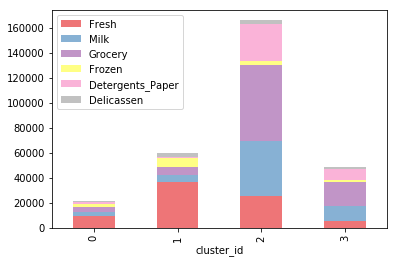

In [14]:
df2.plot.bar( alpha=0.6, figsize=(6,4), stacked=True, cmap='Set1')
if FLAG_fig: plt.savefig('fig_kMeans_WholeSale_Bar.png')
plt.show()

結果の考察

クラスタ番号 = 0 顧客 ( 79件) 、Fresh (生鮮品) やFrozen (冷凍食品) の支出額が比較的高い<br>
クラスタ番号 = 1 顧客 (  7件) 、
クラスタ番号 = 2 顧客 ( 77件) 、
クラスタ番号 = 3 顧客 (280件) 、

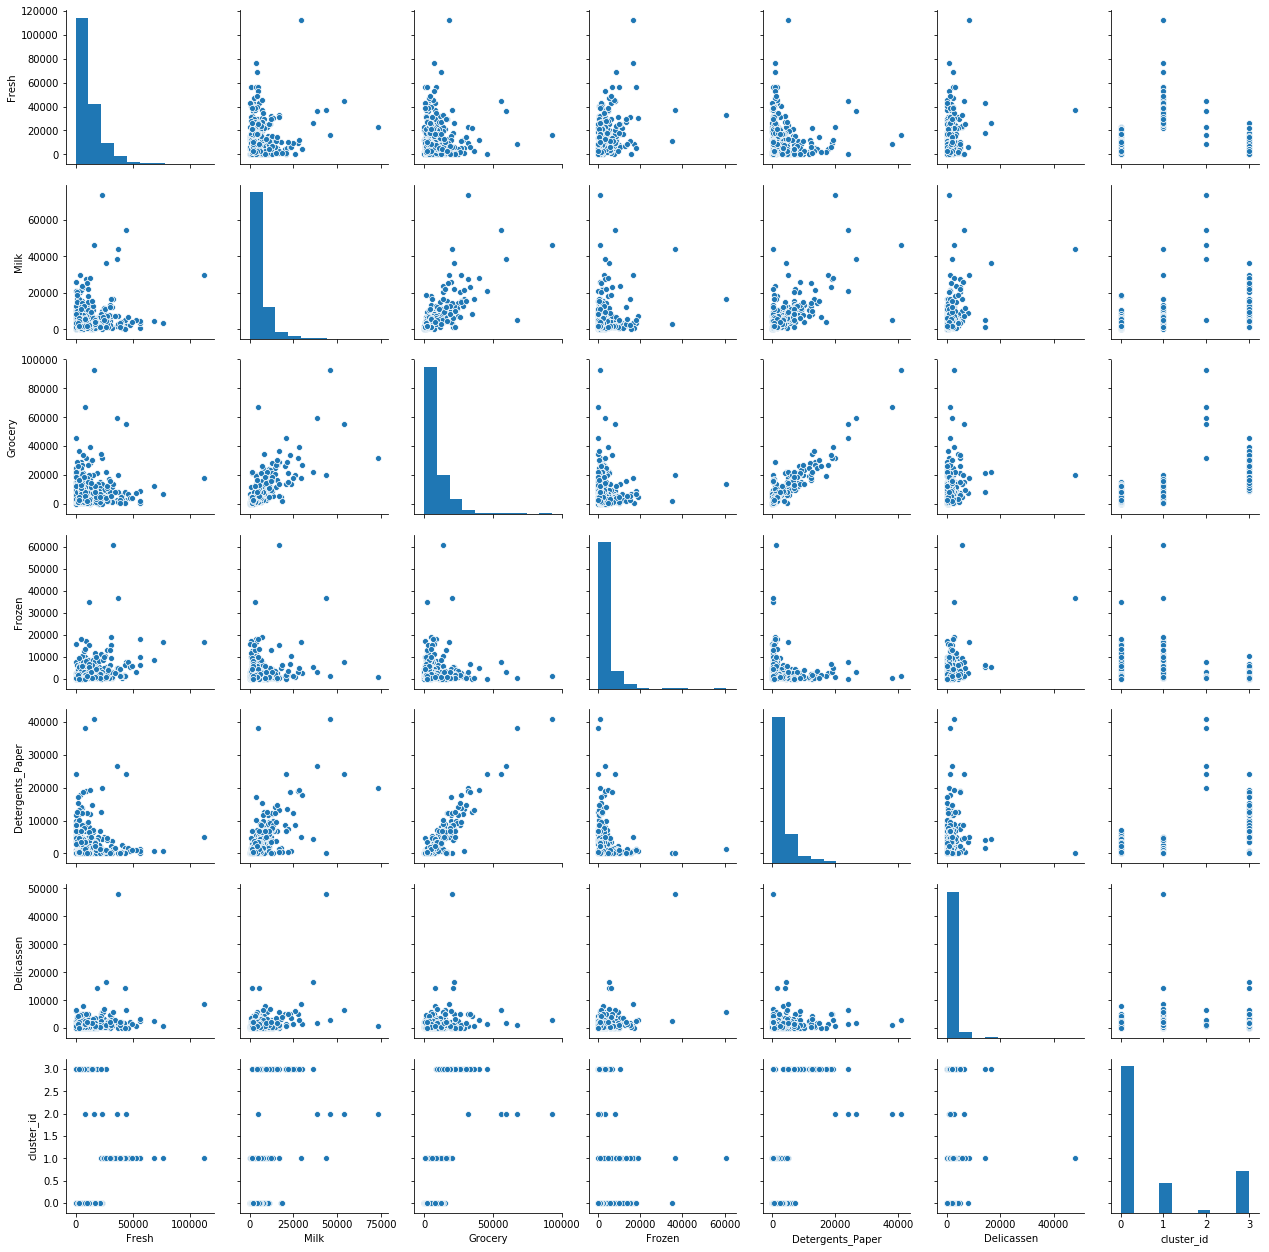

In [15]:
#pd.tools.plotting.scatter_matrix(df_1)
g = sns.pairplot(df_1)

if FLAG_fig: plt.savefig('fig_kMeans_WholeSale_Pairplot.png')
plt.show()

上記の結果で，Grocery，Detergents_Paperの相関が強く，かつ支出額が比較的高いことに注目して，この2変数だけでのクラスタリングを実施する

In [16]:
cstmr_data = np.array([df_1['Grocery'].tolist(),
                       df_1['Detergents_Paper'].tolist()
                       ])
cstmr_data = cstmr_data.T
clstr = KMeans(n_clusters=3).fit_predict(cstmr_data)
clstr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 2,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

この結果を用いた散布図を描く。何らかのクラスタが認められる

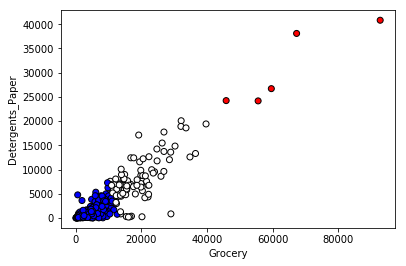

In [17]:
plt.scatter(cstmr_data[:,0], cstmr_data[:,1], c=clstr, cmap=cm.bwr, edgecolors='k')
plt.xlabel('Grocery')
plt.ylabel('Detergents_Paper')

if FLAG_fig: plt.savefig('fig_kMeans_WholeSale_Scatter.png')
plt.show()